In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:

try:
    df = pd.read_csv('SeoulBikeData.csv', encoding='cp949') 
except:
    df = pd.read_csv('SeoulBikeData.csv', encoding='euc-kr') 

print("Available columns:", df.columns.tolist())


Available columns: ['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(占폚)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [14]:

features = ['Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Seasons']
target = 'Rented Bike Count'


In [15]:

df = df[features + [target]].copy().dropna()
df = pd.get_dummies(df, columns=['Seasons'], drop_first=True)


In [16]:

X = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [18]:

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})


In [19]:

print("\nModel Coefficients:")
print(coef_df)
print(f"\nR² Score: {r2_score(y_test, model.predict(X_test)):.3f}")
print(f"MSE: {mean_squared_error(y_test, model.predict(X_test)):.2f}")



Model Coefficients:
            Feature  Coefficient
0    Temperature(C)    26.386220
1       Humidity(%)    -8.905192
2  Wind speed (m/s)    41.770457
3    Seasons_Spring   -89.030635
4    Seasons_Summer   -72.348154
5    Seasons_Winter  -260.523033

R² Score: 0.398
MSE: 250764.51


In [20]:

max_impact = coef_df.loc[coef_df['Coefficient'].abs().idxmax()]
print(f"\nMost impactful feature: '{max_impact['Feature']}' (coef: {max_impact['Coefficient']:.2f})")


Most impactful feature: 'Seasons_Winter' (coef: -260.52)


In [23]:
y_pred = model.predict(X_test)

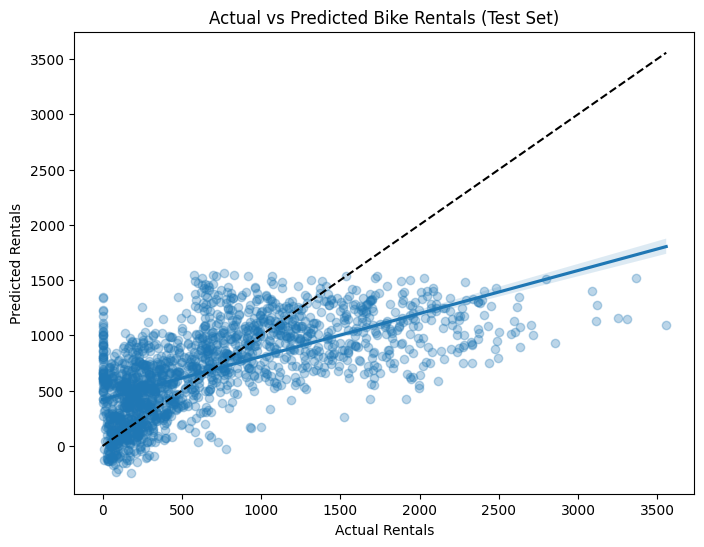

In [24]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3})
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.title('Actual vs Predicted Bike Rentals (Test Set)')
plt.show()